In [25]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from math import sqrt

In [26]:
class SLR():
    '''
    
    Class for implamintation of Simple Linear Regression (SLR)

    '''
    def __init__(self):
        '''
        
        Class constructor

        Attributes:
            PATH_TO_DATASET [str]: relative path to data with positive relation
            PATH_DO_NEGATIVE_DATASET [str]: relative path to data with positive relation
            _dataset [pd.DataFrame]: dataframe with positive relations dataset
            _negative_dataset [pd.DataFrame]: dataframe with negative relations dataset
            _solv [pd.DataFrame]: dataframe with experiments output
             
        '''
        self.PATH_TO_DATASET = 'dataset/flats_moscow.csv'
        self._dataset= pd.DataFrame()
        self._solv = pd.DataFrame(columns=['Real Y', 'Predict Y', 'B1', 'B2', 'Sum of E', 'R'])


    def StoringDataSet(self)->None:
        '''
        
        Storing dataset from csv to DataFrame and choosing only important data(price and area)

        '''
        path = Path(self.PATH_TO_DATASET)
        
        if not path.is_file():  # check is file with dataset exist
            raise Exception(f'Error! File with dataset on path {self.PATH_TO_DATASET} is not exist')
        
        self._dataset= pd.read_csv(self.PATH_TO_DATASET)  # store dataset to dataframe
        
        if self._dataset.empty:  # check is dataframe not empty
            raise Exception(f'Waring! Data set on path {self.PATH_TO_DATASET} is empty. Counting is aborted.')
        
        self._is_stored_dataset = True


    def _Check_dataset(self)->bool:
        '''

        Description:
            Datasets should not be empty
        
        '''
        if self._dataset.empty:
            return False

        return True

    def _Get_dataset(self, positive:bool)->pd.DataFrame:
        '''
        
        Description: 
            Give dataset for experiment

        '''
        return self._dataset

    def _Sampling(self, data:pd.DataFrame, full_dataset:bool, random_sampling:bool, cnt_sample:int)->tuple[np.array, np.array]:
        '''
        Description:
            Datasets sampling

        Parametrs:
            data [pd.DataFrame]: dataframe to sampling
            full_dataset [bool]: work with all data or sample
            random_sampling [bool]: sample with random number of items from diaposon [20, 100]
            cnt_sample  [bool]: items number in sample

        '''
        sample = data.loc[:, ['price', 'totsp']]
        
        if random_sampling:
            cnt_samples = np.random(20, 100)
        else:
            cnt_samples = cnt_sample
        
        if not full_dataset:
            low_x, high_x, low_y, high_y = sample['totsp'].mode()[0]-20, sample['totsp'].mode()[0]+20, sample['price'].mode()[0]-5, sample['price'].mode()[0]+5
            try:
                sample = sample[(sample['totsp'] >= low_x) & (sample['totsp'] <= high_x) & (sample['price'] >= low_y) & (sample['price'] <= high_y)].sample(n=cnt_samples)
            except ValueError as e:
                raise Exception("Warning! Requested count of items in sample more than have dataset on actual data range.")
        
        return sample['totsp'].values, sample['price'].values

    def _Vizualization(self, x:np.array, y:np.array, y_predict:np.array)->None:
        '''
        
        Description:
            Experiments vizualization by plot

        Parametrs:
            x [np.array]: independent data
            y [np.array]: original dependent data
            y_predict [np.array]: prdicted dependet data
        
        '''
        plt.scatter(x, y, marker='o', color='blue')  # original relation

        plt.axis([x.min()-10, x.max()+10, y.min()-10, y.max()+10])
        
        plt.plot(x, y_predict, color='red')  # prediction

        plt.xlabel('area ( m^2)')
        plt.ylabel('cost (1000 $)')
        plt.title('Area to cost')
        
        plt.show()

        
    def _Alg(self, x:np.array, y:np.array)->tuple[np.array, int, float, int, int, float, float]:
        '''

        Description:
            Core of SLR
        
        Attributes:
            x [np.array]: independent data
            y [np.array]: dependent data

        '''

        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        b2 = np.sum(np.multiply((x - x_mean), (y - y_mean)))/np.sum(np.power((x - x_mean), 2))
        b1 = y_mean - b2*x_mean

        y_predict = b1 + b2*x

        e = y - y_predict  # positive (up), negative (down)

        e_sum = np.sum(e)
        y_sum = np.sum(y)
        y_predict_sum = np.sum(y_predict)

        r = (np.mean(np.multiply(x, y)) - np.mean(x)*np.mean(y))/sqrt((np.mean(np.power(x,2))-np.mean(x)**2)*(np.mean(np.power(y,2))-np.mean(y)**2))

        return y_predict, y_sum, y_predict_sum, b1, b2, e_sum, r
        

    def Experiment(self, count:int, full_dataset:bool, random_sampling:bool, positive:bool, cnt_sample:int)->None:
        
        '''
        Description:
            Experiment process.
            Based on input sample, find B1, B2 and count probability Y

        Parametrs:
            count [int]: number of repetitions
            full_dataset [bool]: work with all data or sample
            random_sampling [bool]: sample with random number of items from diaposon [20, 100]
            positive [bool]: data from dataset with positive/negative relation
            cnt_sample [int]: items number in sample

        '''

        
        if count < 0:  # check count of repetitions
            raise Exception('Warning! The range of the number of elements must be greater than zero.')

        if full_dataset:  # one experiment for full dataset
            count = 1

        if not self._Check_dataset():  # check data storing
            raise Exception('Warning! You have empty datasets. Please store a data')
        
        for _ in range(count):  # repetitions

            x, y = self._Sampling(self._Get_dataset(positive), full_dataset, random_sampling, cnt_sample)  # independent(x) and dependent(y) data 
            
            y_predict, y_sum, y_predict_sum, b1, b2, e_sum, r = self._Alg(x, y)  # SLR
            
            self._solv.loc[len(self._solv)] = {'Real Y':y_sum, 'Predict Y':y_predict_sum, 'B1': b1, 'B2': b2, 'Sum of E':e_sum, 'R': r}   # store output of actual expiriment
            
            if count == 1:  # vizual for only one experiment
                self._Vizualization(x, y, y_predict)


        print(self._solv)

    

In [27]:
# Prepare data

SLR_solv = SLR()
SLR_solv.StoringDataSet()


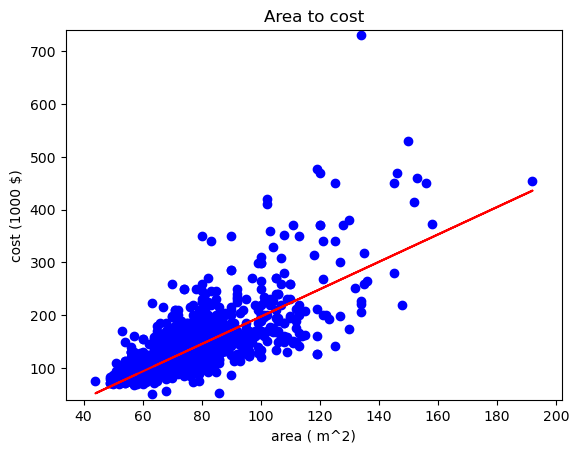

   Real Y  Predict Y         B1        B2      Sum of E         R
0  260093   260093.0 -62.044844  2.593462 -5.042011e-11  0.756042


In [28]:
# First experiment
# Description: SLR with full dataset (positive relation)

SLR_solv.Experiment(count=1, full_dataset=True, random_sampling=False, positive=False, cnt_sample=0)